<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Temporal-Variables" data-toc-modified-id="Temporal-Variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Temporal Variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Multi-variate-Analysis" data-toc-modified-id="Multi-variate-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multi-variate Analysis</a></span><ul class="toc-item"><li><span><a href="#Monthly" data-toc-modified-id="Monthly-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Monthly</a></span></li><li><span><a href="#Quarterly" data-toc-modified-id="Quarterly-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Quarterly</a></span></li><li><span><a href="#Month-and-year" data-toc-modified-id="Month-and-year-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Month and year</a></span></li><li><span><a href="#Group-and-District" data-toc-modified-id="Group-and-District-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Group and District</a></span></li></ul></li><li><span><a href="#Map-visualization" data-toc-modified-id="Map-visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Map visualization</a></span></li></ul></div>

# Data Description
- Data source: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

**Context**  
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

**Content**  
Records begin in June 14, 2015 and continue to September 3, 2018.

**Acknowledgements**  
The data is provided by Analyze Boston. The most up-to-date version can be found [here](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system).

**Inspiration**  
- What types of crimes are most common? 
- Where are different types of crimes most likely to occur? 
- Does the frequency of crimes change over the day? Week? Year?

# Imports

In [1]:
import bhishan

In [2]:
%load_ext autoreload

In [3]:
autoreload 2

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
random_state=100
np.random.seed(random_state)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


# Load the data

In [5]:
df = pd.read_csv('../data/processed/data_cleaned.csv',encoding='latin-1')
df = df.sort_values('date')
print(df.shape)
df.head(2).append(df.tail(2))

(319073, 23)


,incident,code,group,description,district,area,shooting,date,year,month,dayofweek,hour,ucr_part,street,lat,long,location,dayofmonth,dayofyear,weekofyear,quarter,day_name,month_name
129056,I172040657,2629,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,2015,6,0,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",15,166,25,2,Monday,June
314676,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,2015,6,0,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)",15,166,25,2,Monday,June
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,0,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",3,246,36,3,Monday,September
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,N,2018-09-03 21:25:00,2018,9,0,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",3,246,36,3,Monday,September


# Univariate Analysis

## Temporal Variables

In [6]:
df.columns

Index(['incident', 'code', 'group', 'description', 'district', 'area',
       'shooting', 'date', 'year', 'month', 'dayofweek', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location', 'dayofmonth', 'dayofyear',
       'weekofyear', 'quarter', 'day_name', 'month_name'],
      dtype='object')

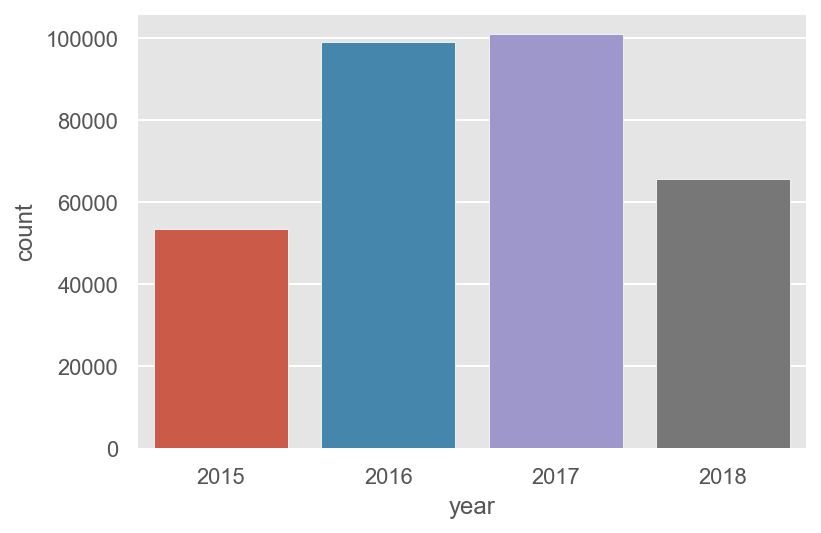

In [7]:
sns.countplot(data=df, x='year');

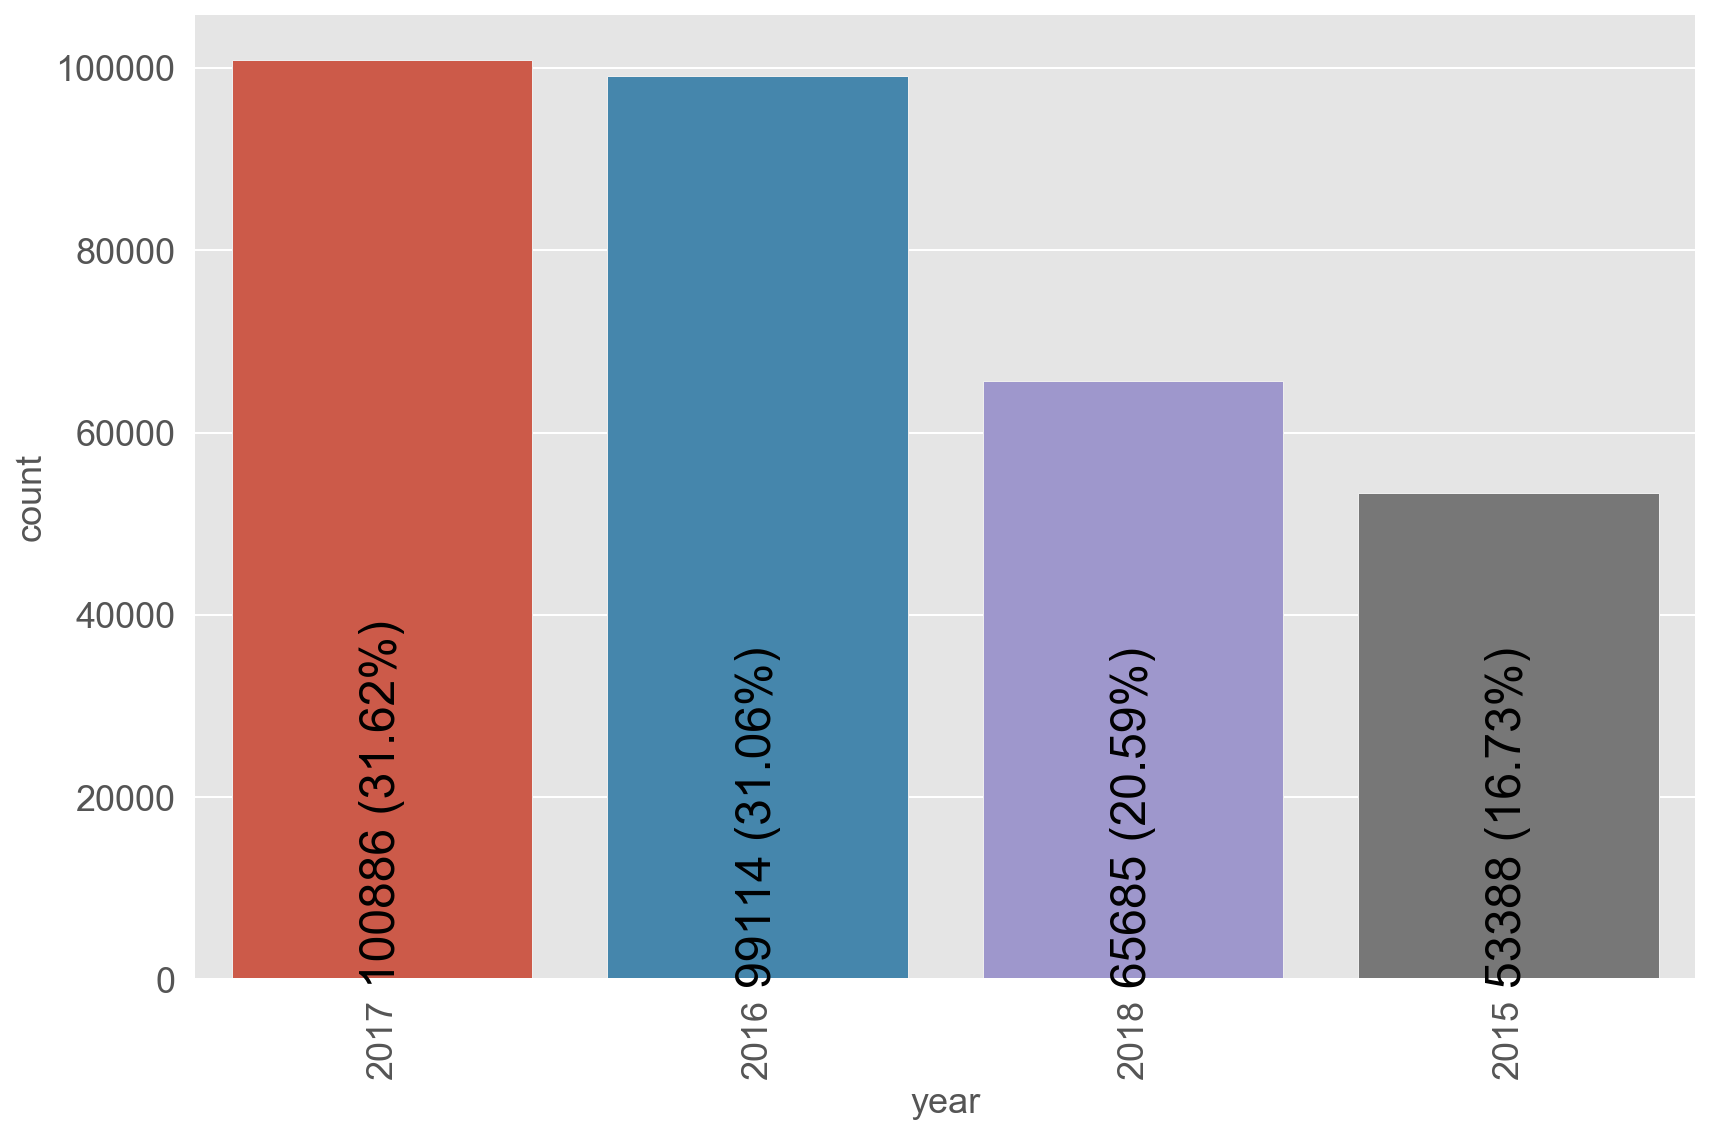

In [8]:
from bhishan.util_viz import count_plot
count_plot(df,'year',bottom=200, ofile='../reports/figures/yearly_crime_counts.png')

In [9]:
# sns.countplot(data=df, x='month');

In [10]:
# sns.countplot(data=df, x='hour');

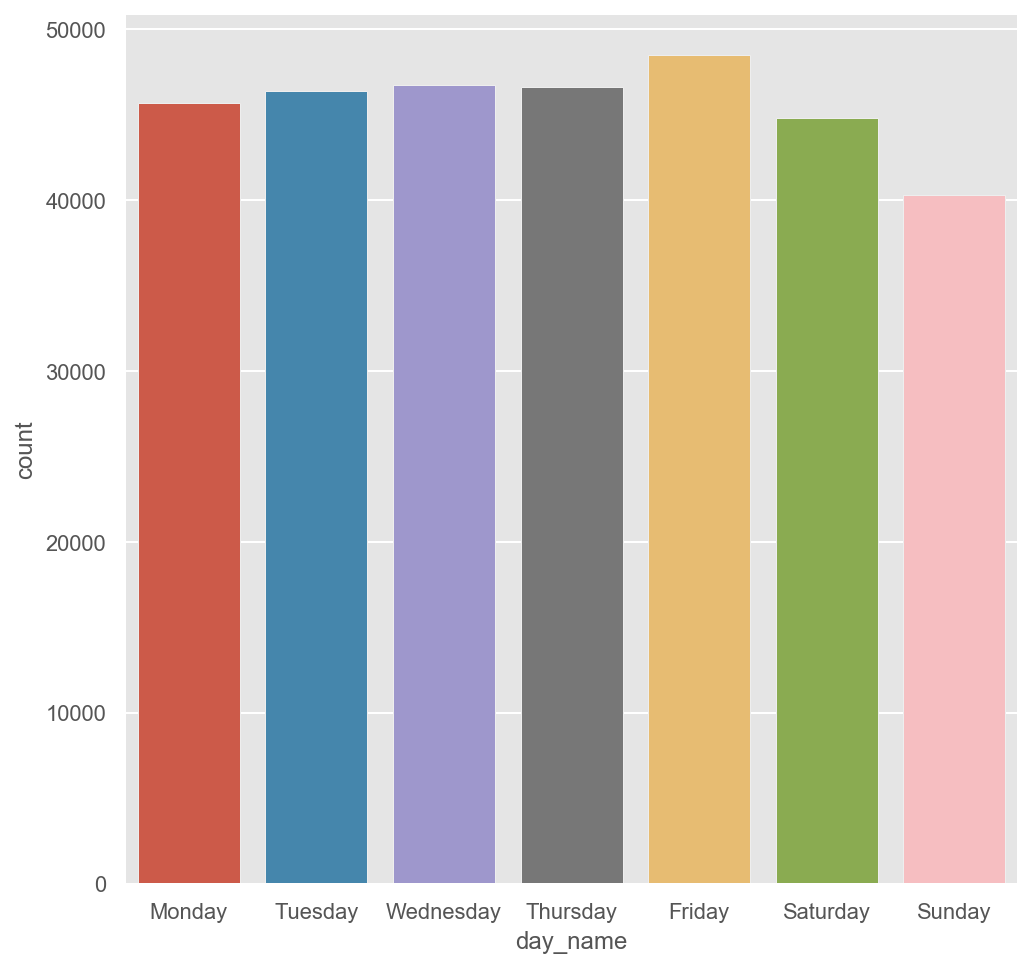

In [26]:
sns.countplot(data=df, x='day_name');

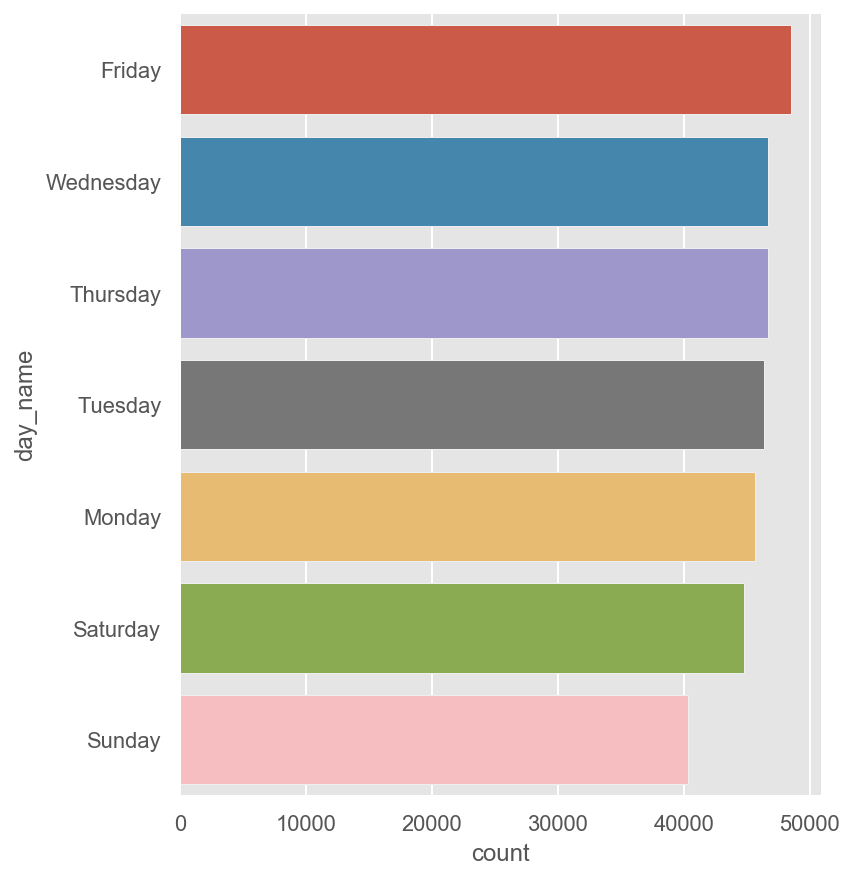

In [27]:
sns.catplot(y='day_name',
            kind='count',
            height=6, 
            aspect=1,
            order=df['day_name'].value_counts().index,
            data=df)

In [12]:
# plt.figure(figsize=(12,8))
# sns.countplot(data=df, x='weekofyear');

## Categorical variables

In [13]:
df.columns

Index(['incident', 'code', 'group', 'description', 'district', 'area',
       'shooting', 'date', 'year', 'month', 'dayofweek', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location', 'dayofmonth', 'dayofyear',
       'weekofyear', 'quarter', 'day_name', 'month_name'],
      dtype='object')

In [14]:
df.head()

,incident,code,group,description,district,area,shooting,date,year,month,dayofweek,hour,ucr_part,street,lat,long,location,dayofmonth,dayofyear,weekofyear,quarter,day_name,month_name
129056,I172040657,2629,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,2015,6,0,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",15,166,25,2,Monday,June
314676,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,2015,6,0,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)",15,166,25,2,Monday,June
310350,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,N,2015-06-15 00:00:00,2015,6,0,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)",15,166,25,2,Monday,June
253464,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,N,2015-06-15 00:00:00,2015,6,0,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)",15,166,25,2,Monday,June
8793,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,N,2015-06-15 00:00:00,2015,6,0,0,Part Three,BERNARD,42.352942,-71.151104,"(-1.00000000, -1.00000000)",15,166,25,2,Monday,June


In [15]:
df['shooting'].value_counts()

N    318054
Y      1019
Name: shooting, dtype: int64

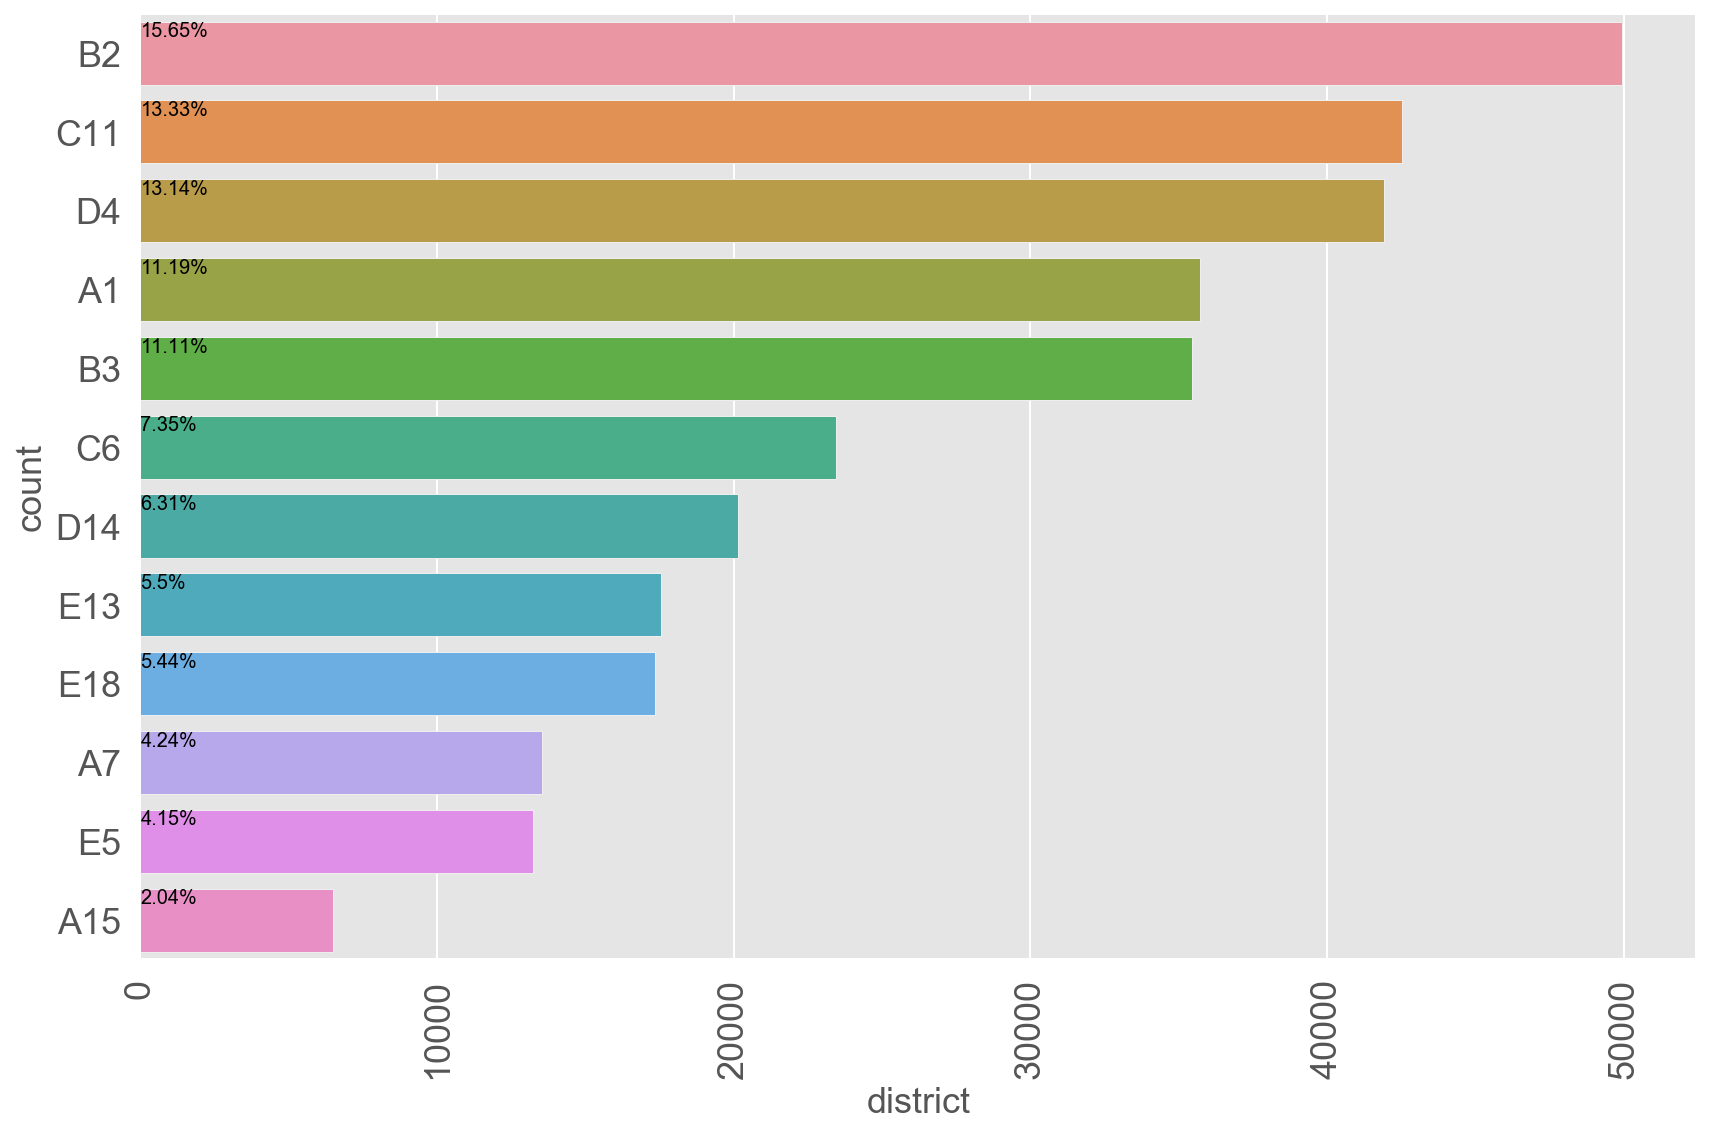

In [39]:
count_plot(df,'district',horizontal=True)

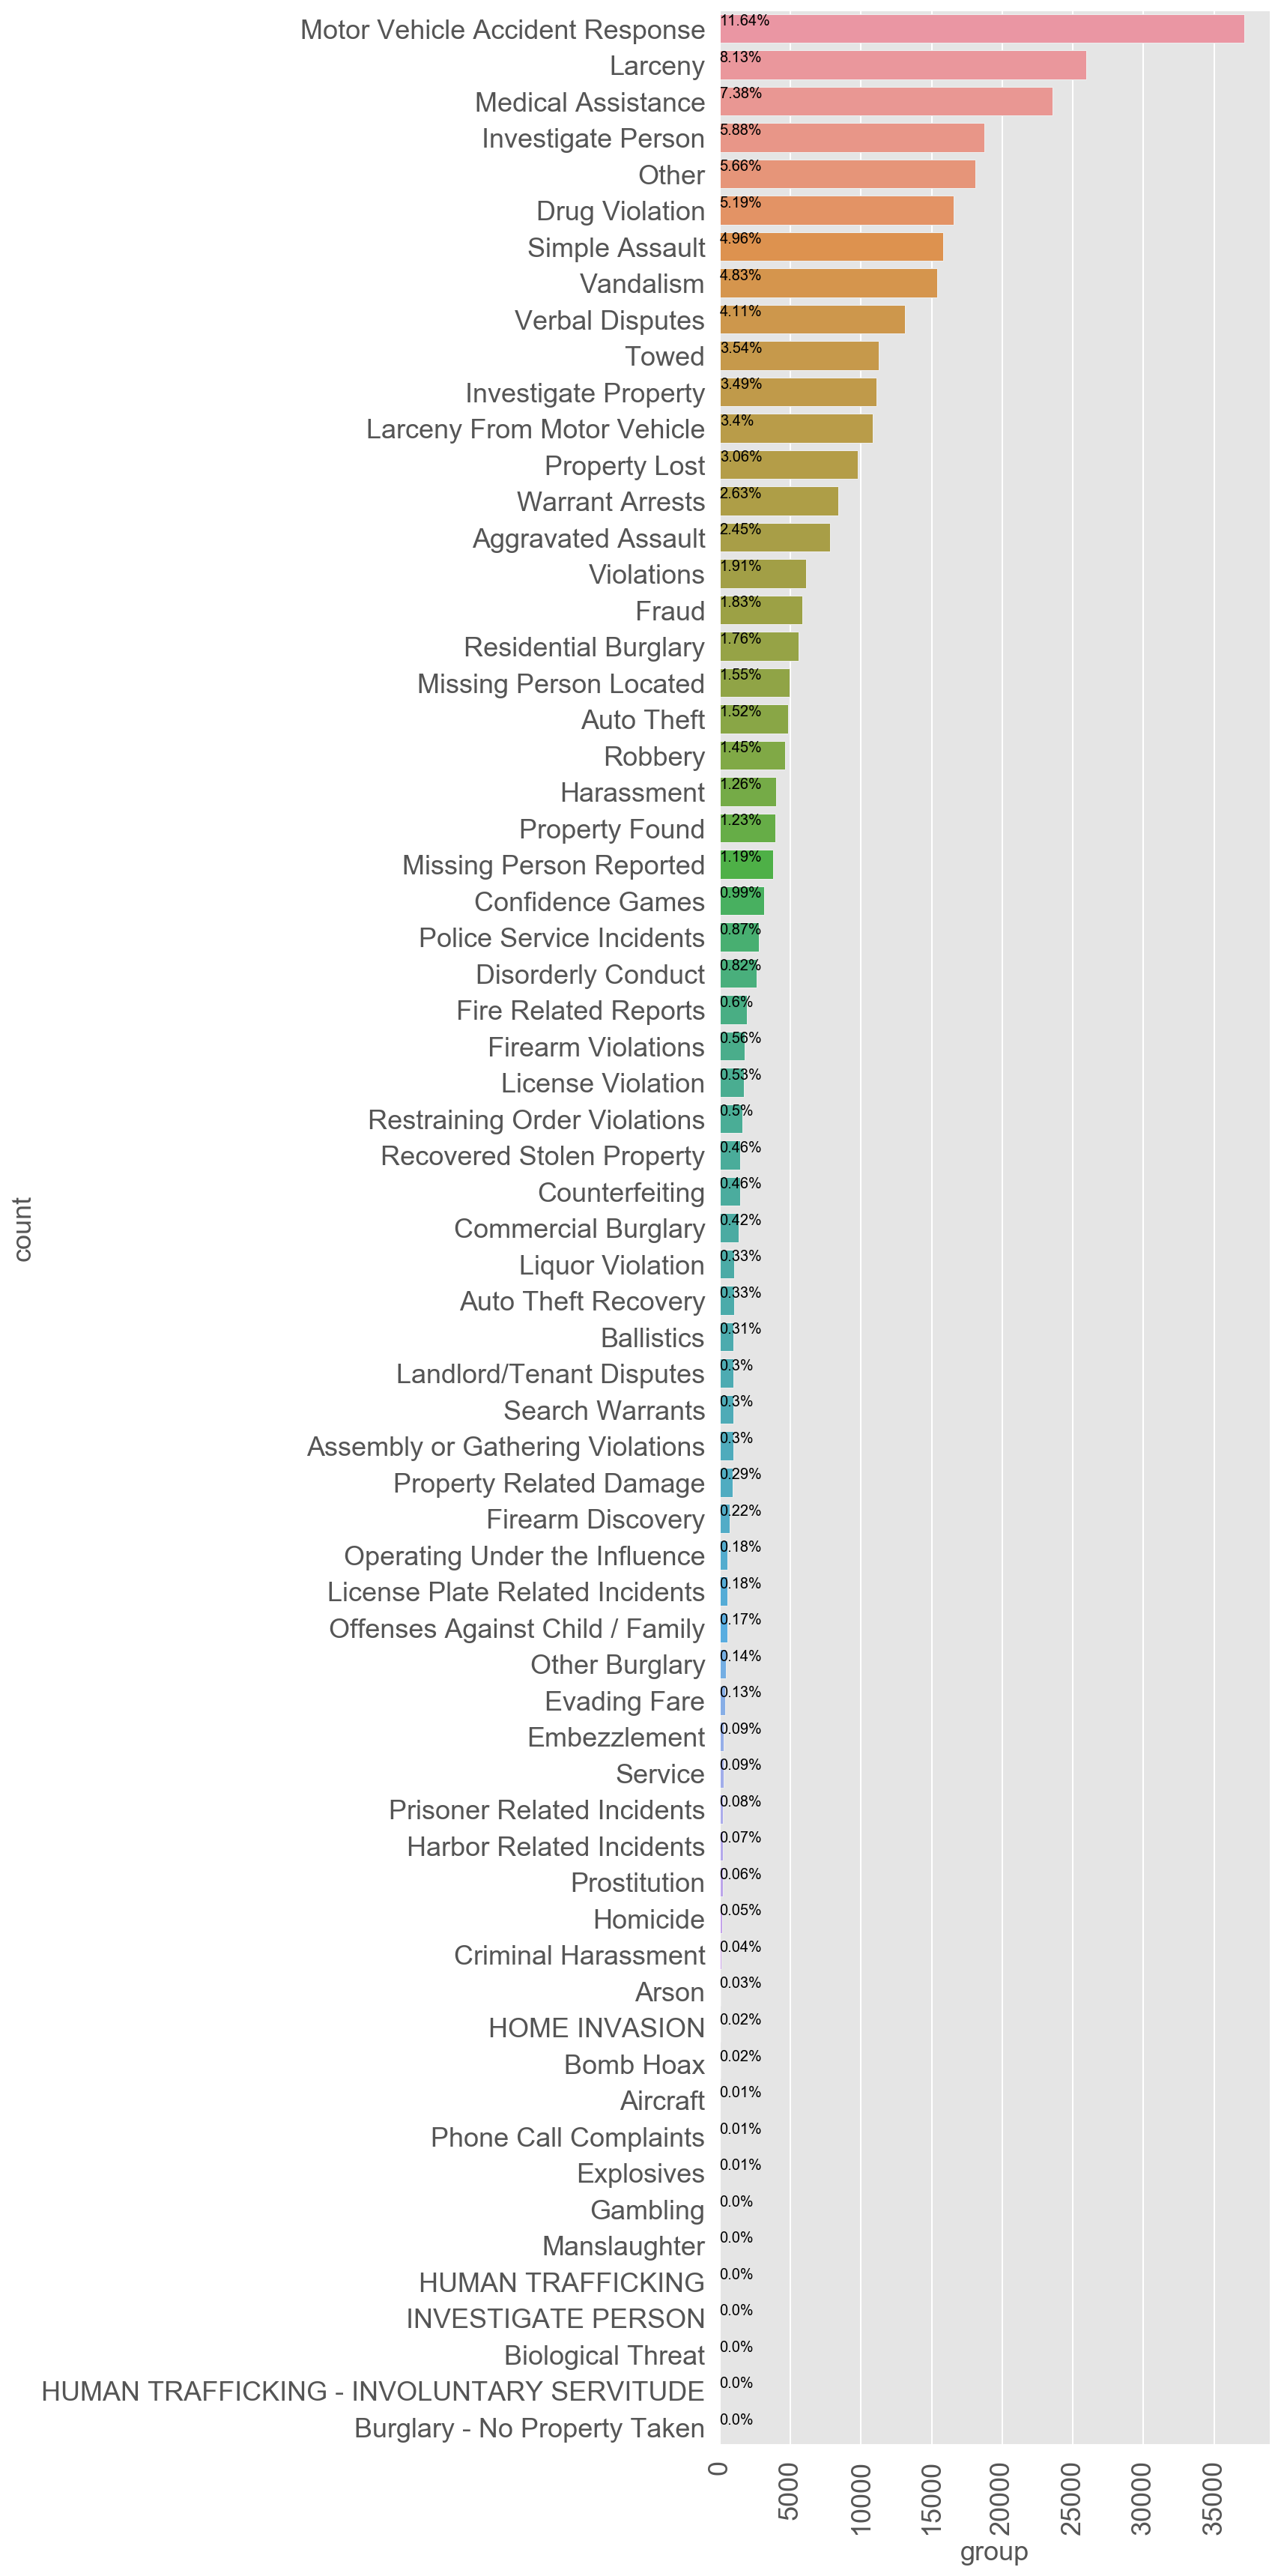

In [25]:
count_plot(df,'group',percent=True,figsize=(12,24),horizontal=True)

# Multi-variate Analysis

## Monthly

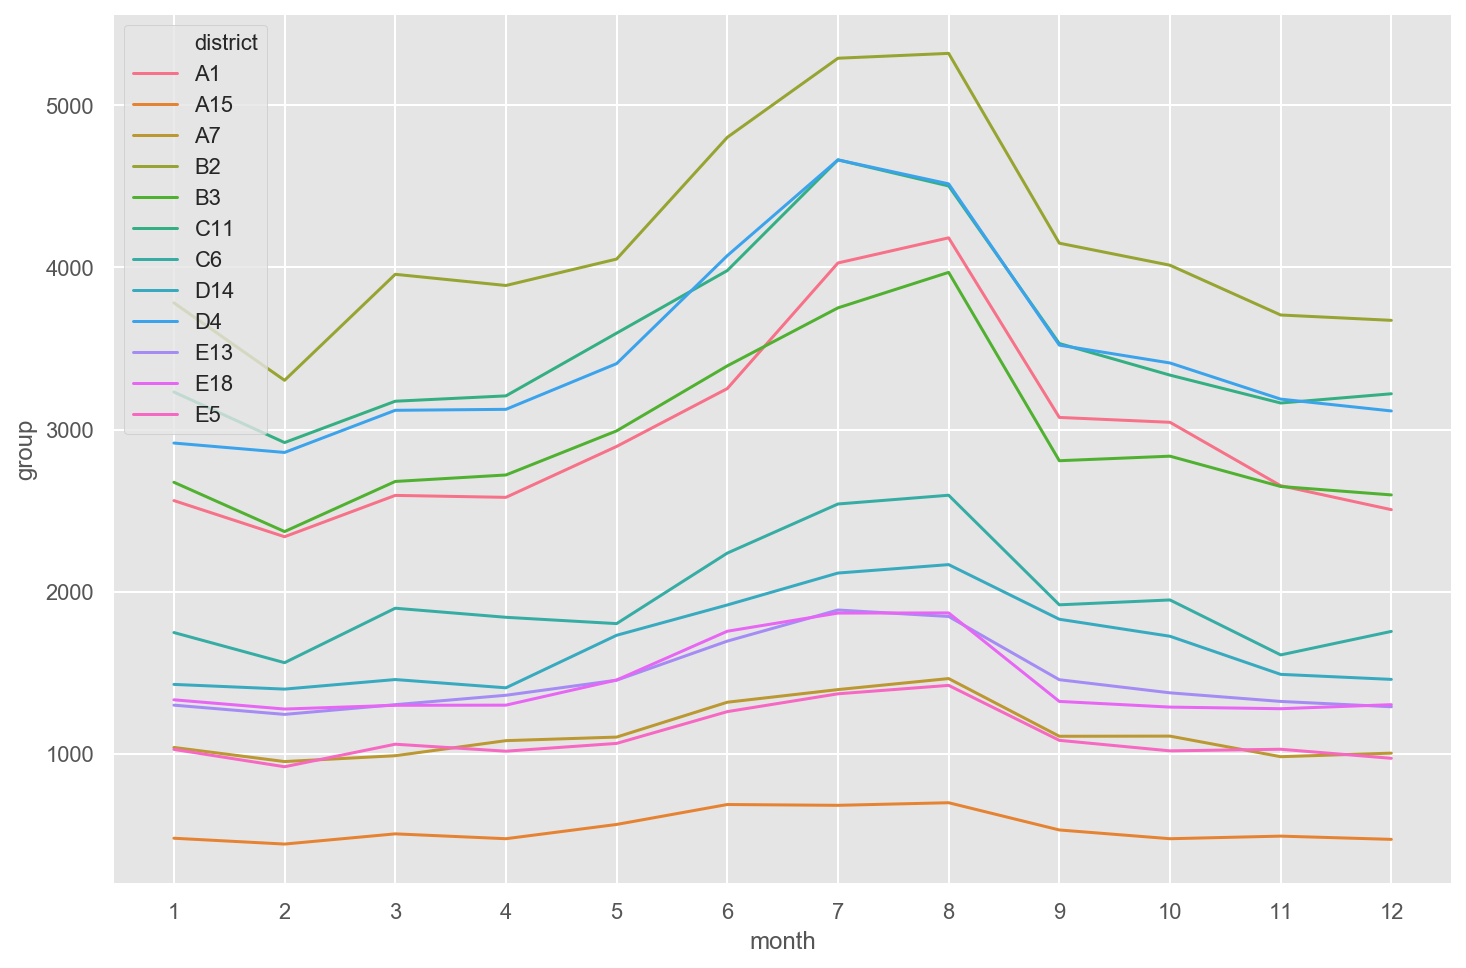

In [30]:
# monthly crime count for districts
data = df.groupby(['month','district']).count().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=data, x='month',y='group',hue='district')
plt.xticks(range(1,13));

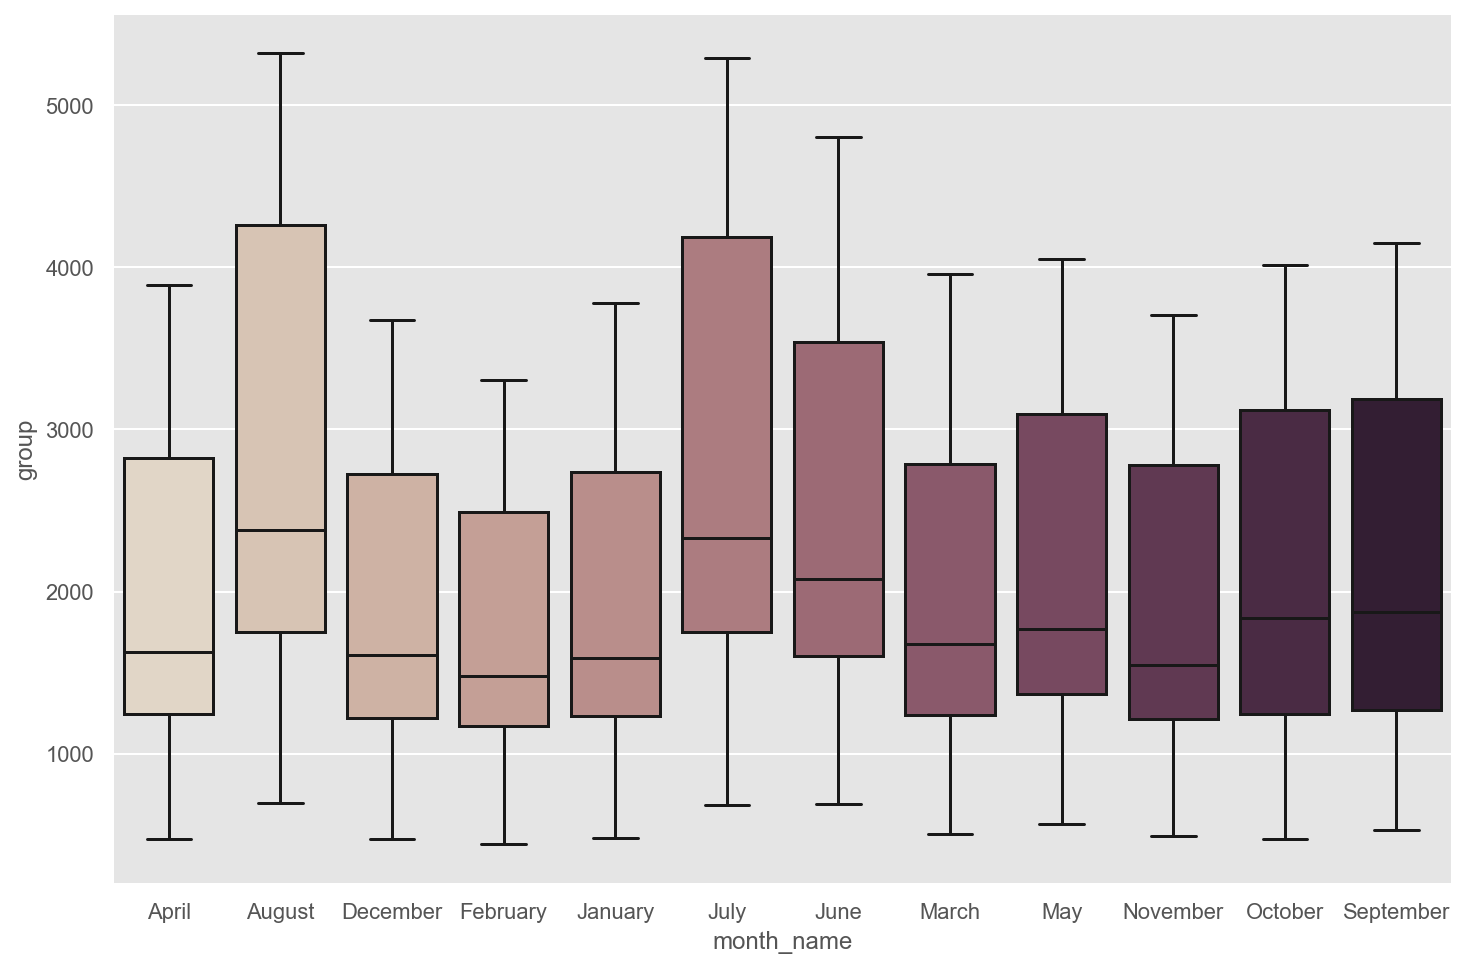

In [34]:
plt.figure(figsize=(12,8))
grouped = df.groupby(['month_name','district']).count()
sns.boxplot(x ="month_name", y = "group", data = grouped.reset_index(), palette="ch:.25");

<Figure size 864x576 with 0 Axes>

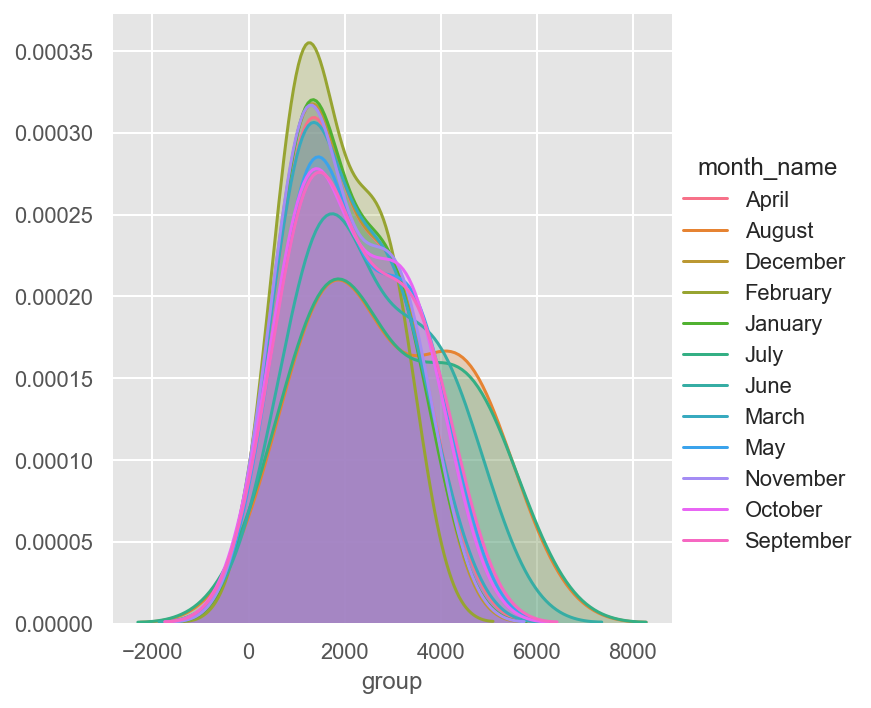

In [37]:
grouped = df.groupby(['month_name','district']).count()
sns.FacetGrid(data = grouped.reset_index(), 
             hue = "month_name",
             height = 5).map(sns.kdeplot, "group", shade = True).add_legend();

## Quarterly

In [21]:
# Top 5 groups quarterly crime

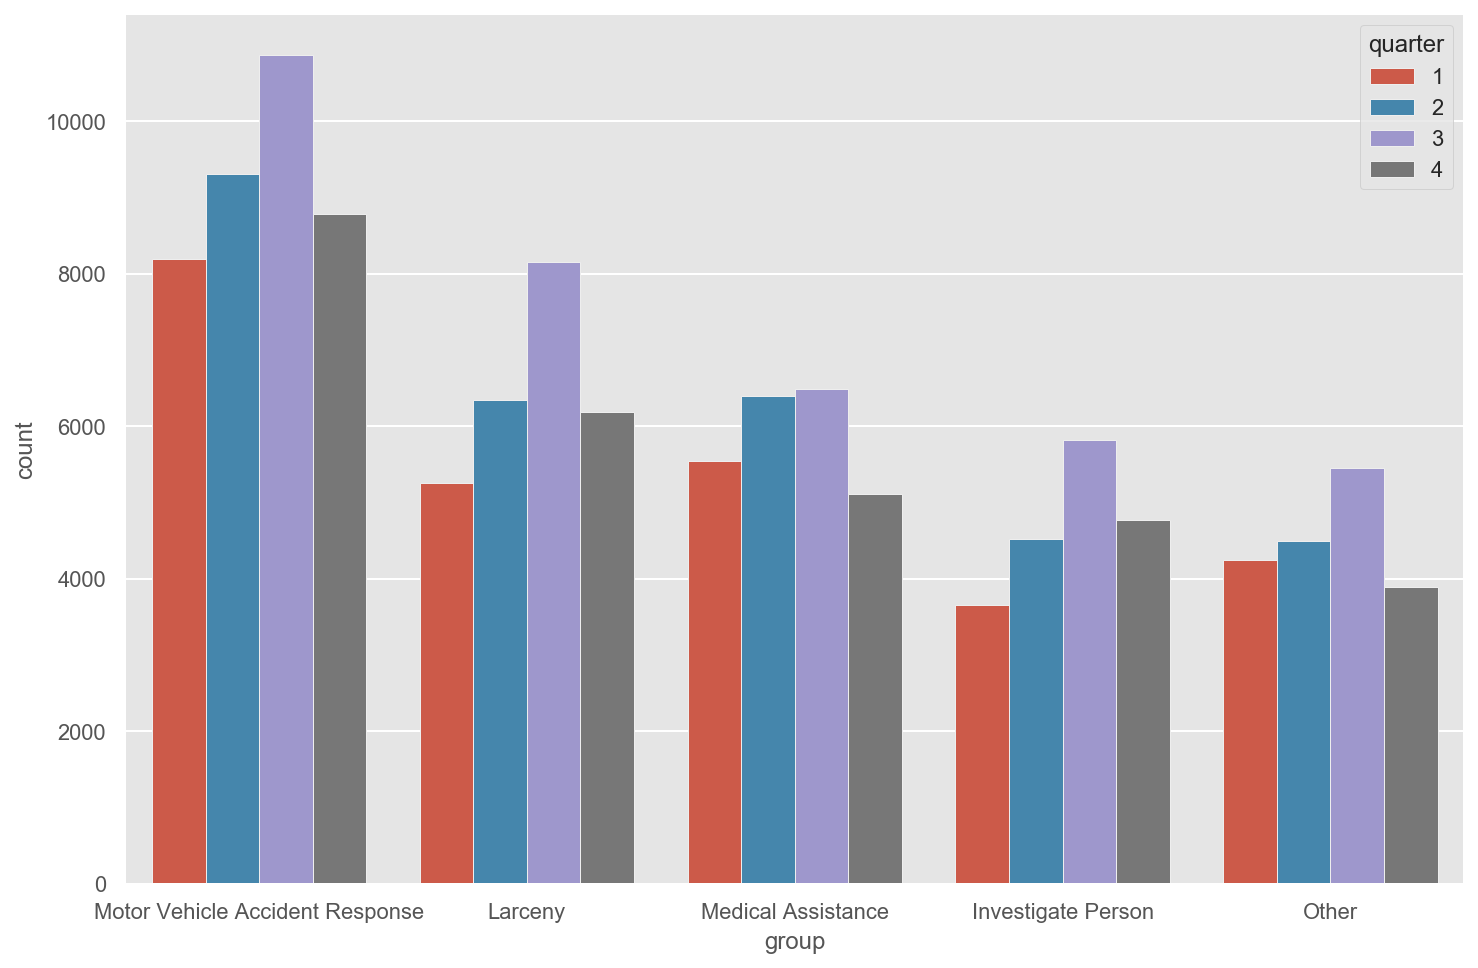

In [22]:
plt.figure(figsize=(12,8))
order = df['group'].value_counts().head(5).index
sns.countplot(data = df, x='group',hue='quarter', order = order);

## Month and year

<Figure size 864x576 with 0 Axes>

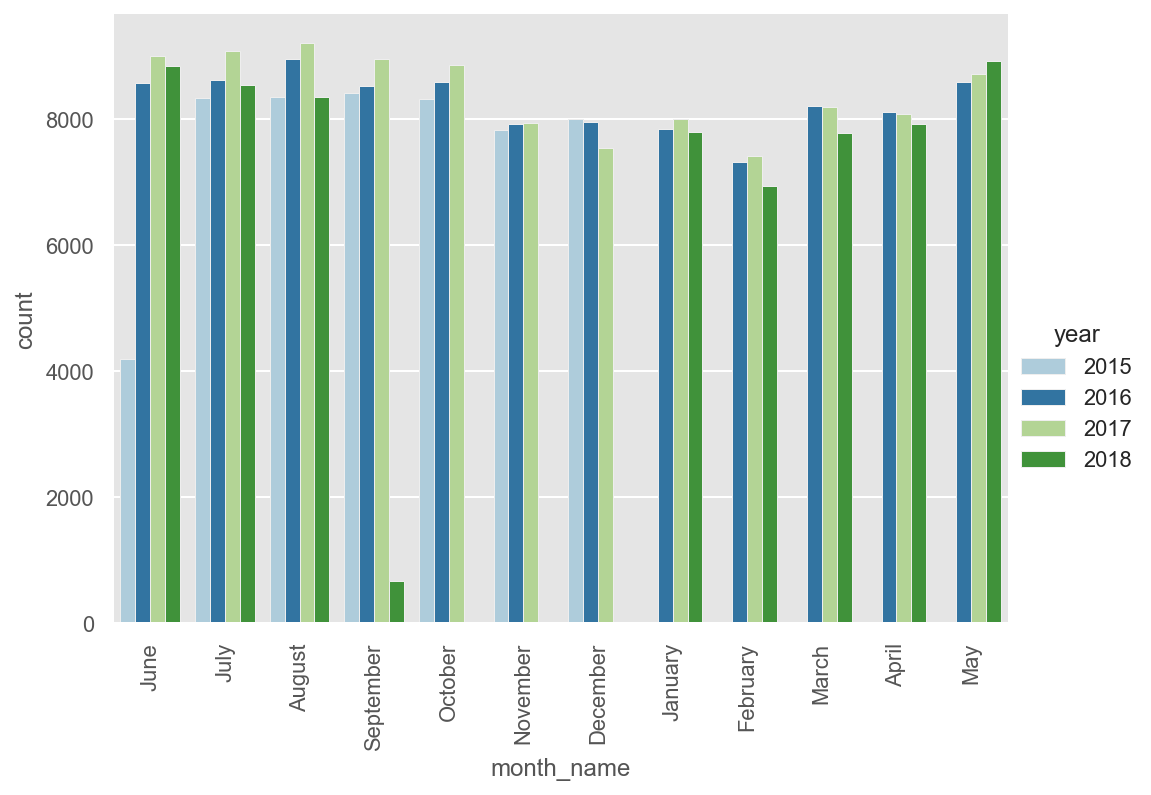

In [43]:
plt.figure(figsize=(12,8))
sns.catplot(x="month_name", hue="year", kind="count",
            palette="Paired",height=5, aspect=7/5, data=df)
plt.xticks(rotation=90);

## Group and District

Index(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other'],
      dtype='object')


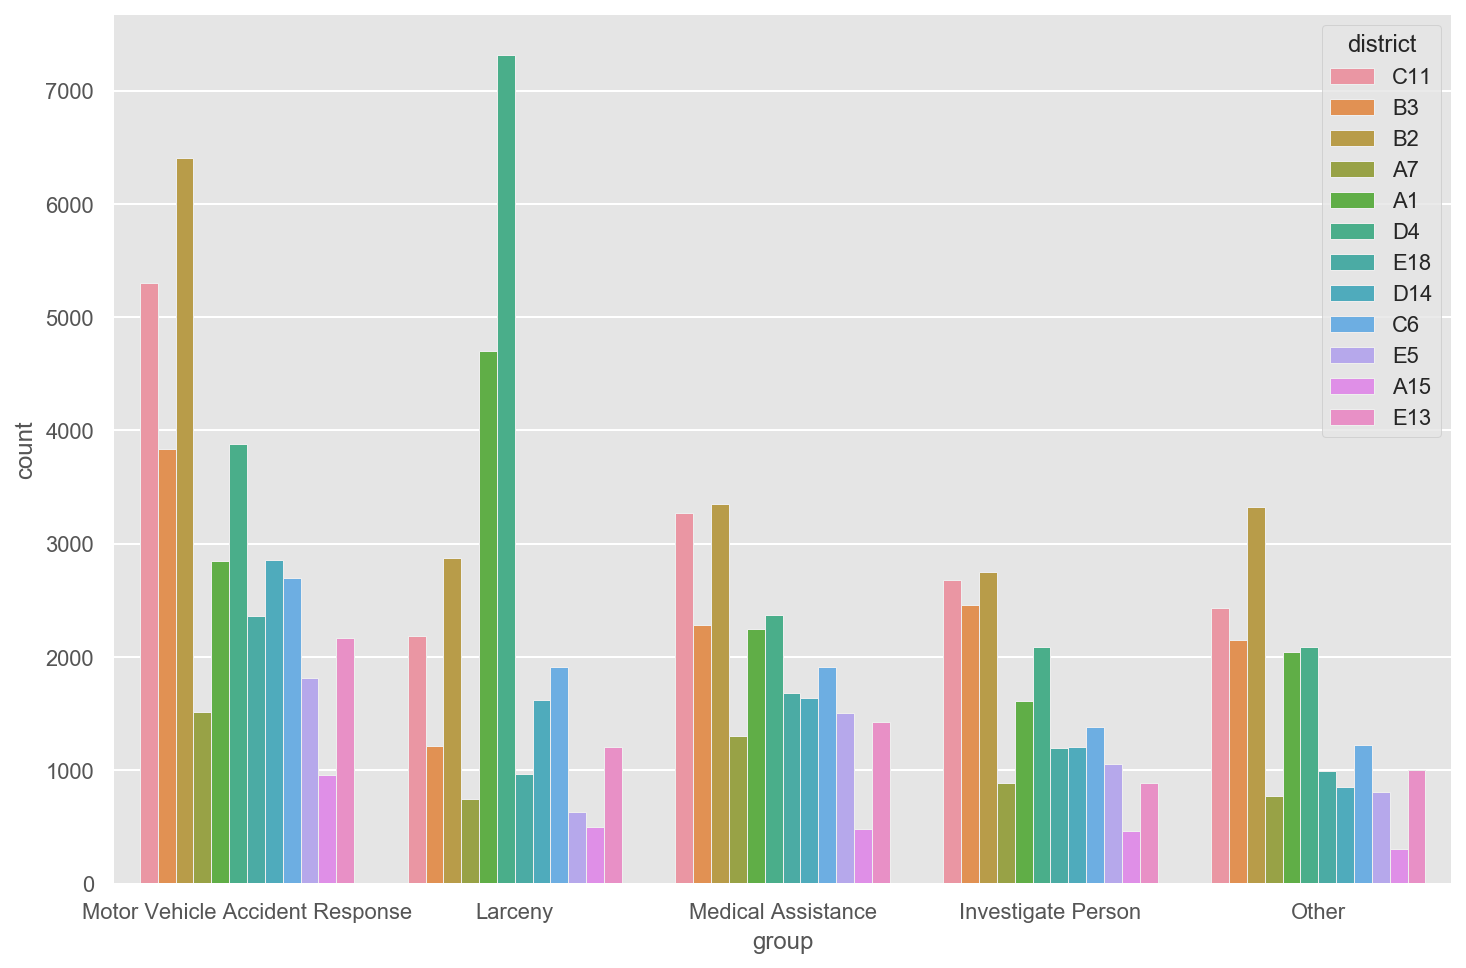

In [17]:
plt.figure(figsize=(12,8))
order = df['group'].value_counts().head(5).index
print(order)
sns.countplot(data = df, x='group',hue='district', order = order);

# Map visualization

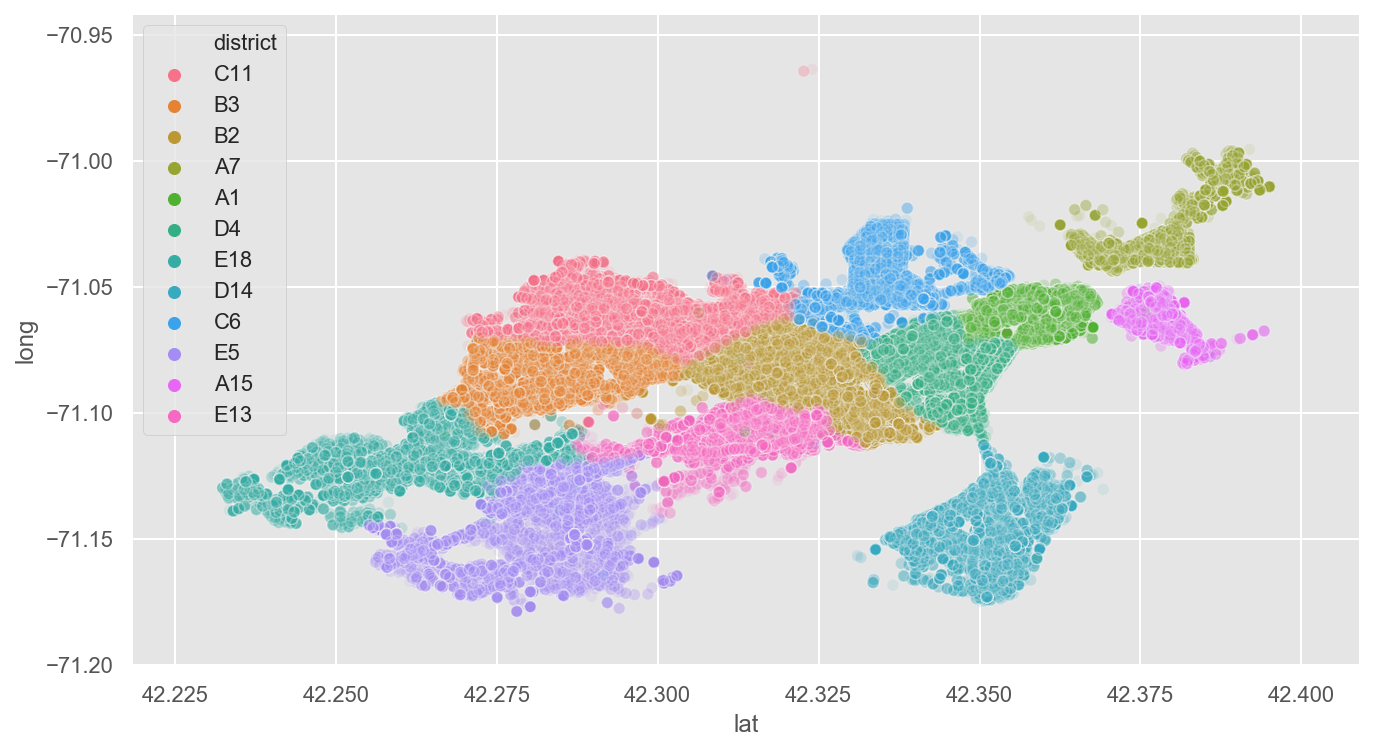

In [38]:
plt.subplots(figsize=(11,6))
sns.scatterplot(x='lat',
                y='long',
                hue='district',
                alpha=0.1,
                data=df)
plt.legend(loc=2)